In [ ]:
def fib1(n):
  assert n == 0 or n >= 1 # n >= 0
  if n == 0 or n == 1: # n <= 1
    return 1
  else:
    return fib1(n - 1) + fib1(n - 2)


In [ ]:
fib1(8)

21

In [ ]:
cache = {}

In [ ]:
def fib2(n):
  assert n == 0 or n >= 1 # n >= 0
  if n not in caсhe:
    if n == 0 or n == 1: # n <= 1
      caсhe[n] = 1
    else:
      caсhe[n] = fib2(n - 1) + fib2(n - 2)
  return caсhe[n]


In [ ]:
fib2(80)

23416728348467685

In [ ]:
def memo(f):
  cache = {}
  def inner(n):
    if n not in cache:
      cache[n] = f(n)
    return cache[n]
  return inner

In [ ]:
old_fib1 = fib1

In [ ]:
fib1 = memo(old_fib1)

In [ ]:
fib1(80)

23416728348467685

In [ ]:
from functools import lru_cache

In [ ]:
fib3 = lru_cache(maxsize=None)(old_fib1)

In [ ]:
fib3(80)

23416728348467685

In [ ]:
def fib4(n):
  assert n == 0 or n >= 1
  f0, f1 = 0, 1
  for i in range(n - 1):
    f0, f1 = f1, f0 + f1
  return f1

In [ ]:
fib4(8000)
# fib2(8000) - ошибка, т.к. нельзя вызывать рекурсию до бесконечности

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

In [ ]:
import time
def timed(f, *args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

In [ ]:
from matplotlib import pyplot as plt
def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label = f.__name__)
        plt.legend()
        plt.grid(True)

In [ ]:
timed(fib4, 800)

6.788800010326668e-05

In [ ]:
fib1 = old_fib1

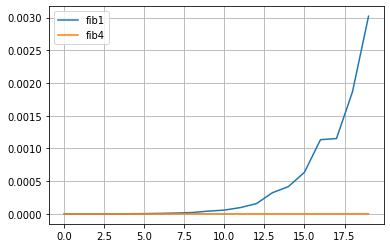

In [ ]:
compare([fib1, fib4], list(range(20)))